# 逻辑回归中使用多项式特征

> 核心是把高次幂的项看做一个整体，画图的时候再替换下就好了

![多项式如何等效成线性方程](images/多项式如何等效成线性方程.png)

## 演示一个圆形边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2)) # 生成均值为0，方差为1的200行2列的数据
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int') # 两个特征的平方和小于1.5时为True(可以看做0)，大于等于1.5时看做1

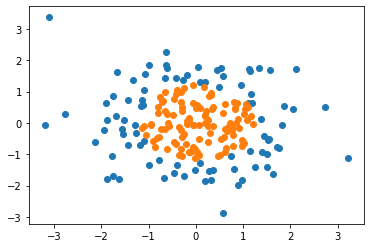

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [4]:
from playML.LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [6]:
log_reg.score(X, y) # 预测正确率不高

0.605

In [7]:
def plot_decision_boundary(model, axis):
    """
    根据模型绘制决策边界
    """
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


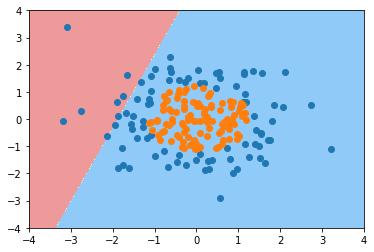

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 从下图可以看到直接使用直线，预测效果比较差

## 为逻辑回归添加多项式项

In [9]:
# 为逻辑回归添加多项式项的管道
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)), # 把高次幂转换为线性方程
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression()) # 我们自己实现地逻辑回归类是遵循scikit-learn标准的，所以可以无缝地传给Pipeline
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)# degree 越大，曲线越规则
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


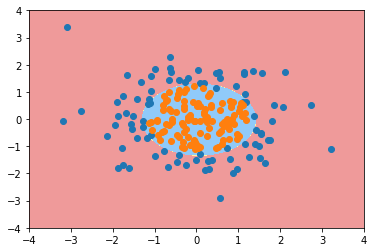

In [11]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 从下图可以看到直接使用直线，预测效果比较差

In [12]:
poly_log_reg.score(X, y) # 预测正确率明显高了

0.95

In [14]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


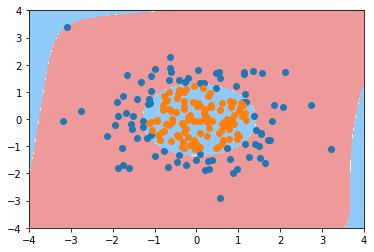

In [15]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 从下图可以看到直接使用直线，预测效果比较差